In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from urllib.request import urlopen

In [39]:
# Verstappen Azerbaijan sprint data, 29th April 2023

response: object = urlopen('https://api.openf1.org/v1/intervals?session_key=9069&driver_number=1')
data: json = json.loads(response.read().decode('utf-8'))
df: pd.DataFrame = pd.DataFrame(data)

verLapResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9069&driver_number=1')
verLapData: json = json.loads(verLapResponse.read().decode('utf-8'))
dfLap: pd.DataFrame = pd.DataFrame(verLapData)

verLapGPResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9070&driver_number=1')
verLapGPData: json = json.loads(verLapGPResponse.read().decode('utf-8'))
dfGPLap: pd.DataFrame = pd.DataFrame(verLapGPData)

perLapResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9069&driver_number=11')
perLapData: json = json.loads(perLapResponse.read().decode('utf-8'))
dfPerLap: pd.DataFrame = pd.DataFrame(perLapData)

perLapGPResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9070&driver_number=11')
perLapGPData: json = json.loads(perLapGPResponse.read().decode('utf-8'))
dfPerGPLap: pd.DataFrame = pd.DataFrame(perLapGPData)

dfLap.head()
df.head()
dfGPLap.head()

print(dfGPLap.shape)
print(dfLap.shape)
print(df.shape)

(51, 16)
(17, 16)
(425, 6)


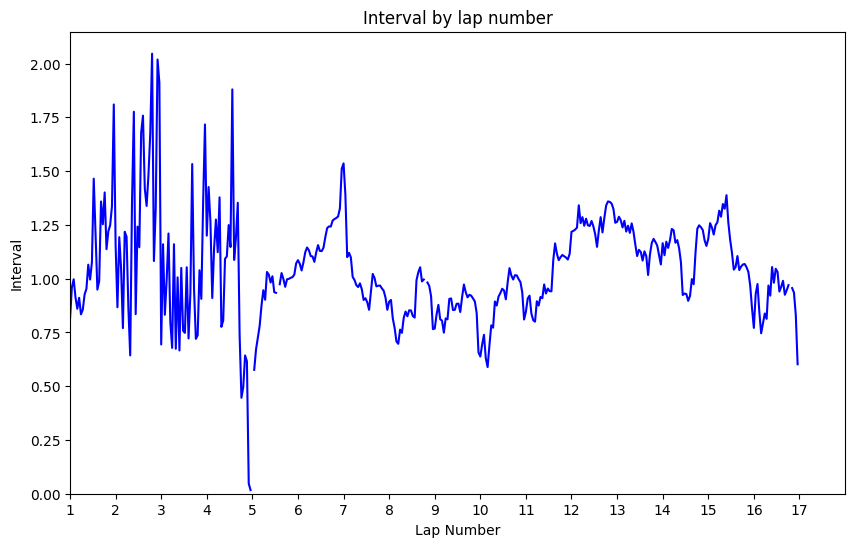

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df.index /25, df['interval'], marker='', color='blue')

plt.title("Interval by lap number")
plt.xlabel("Lap Number")
plt.ylabel("Interval")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()


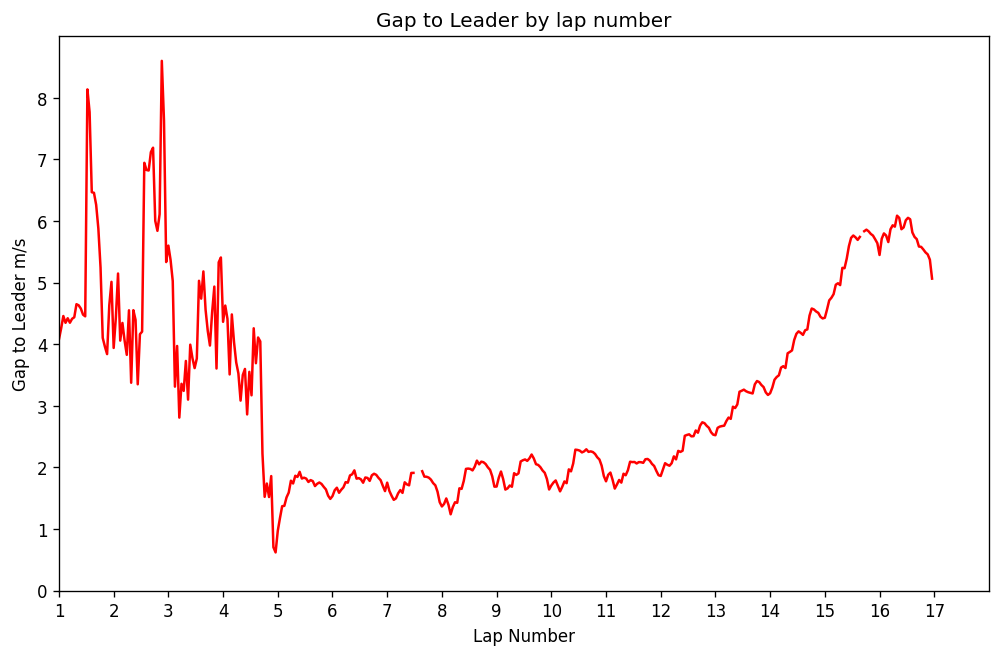

In [41]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(df.index / 25, df['gap_to_leader'], color='red', marker='')

plt.title("Gap to Leader by lap number")
plt.xlabel("Lap Number")
plt.ylabel("Gap to Leader m/s")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()

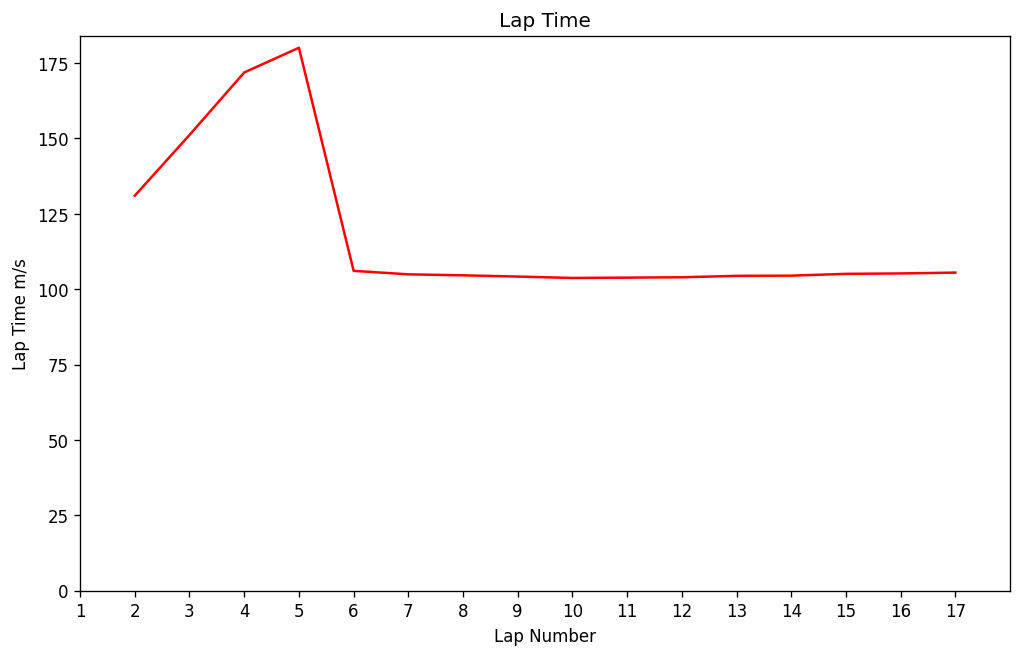

In [42]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='')

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()

Sprint Lap Duration: 
Lap Time: nan : nan seconds
Lap Time: 2.0 : 11.008999999999986 seconds
Lap Time: 2.0 : 31.145999999999987 seconds
Lap Time: 2.0 : 51.87700000000001 seconds
Lap Time: 3.0 : 0.07499999999998863 seconds
Lap Time: 1.0 : 46.086 seconds
Lap Time: 1.0 : 44.928 seconds
Lap Time: 1.0 : 44.596999999999994 seconds
Lap Time: 1.0 : 44.184 seconds
Lap Time: 1.0 : 43.723 seconds
Lap Time: 1.0 : 43.834999999999994 seconds
Lap Time: 1.0 : 43.952 seconds
Lap Time: 1.0 : 44.42100000000001 seconds
Lap Time: 1.0 : 44.489999999999995 seconds
Lap Time: 1.0 : 45.086 seconds
Lap Time: 1.0 : 45.224000000000004 seconds
Lap Time: 1.0 : 45.5 seconds
GP Lap Duration: 
Lap Time: nan : nan seconds
Lap Time: 1.0 : 47.706999999999994 seconds
Lap Time: 1.0 : 47.67700000000001 seconds
Lap Time: 1.0 : 47.108000000000004 seconds
Lap Time: 1.0 : 47.476 seconds
Lap Time: 1.0 : 47.202 seconds
Lap Time: 1.0 : 46.995000000000005 seconds
Lap Time: 1.0 : 46.801 seconds
Lap Time: 1.0 : 46.944 seconds
Lap Time

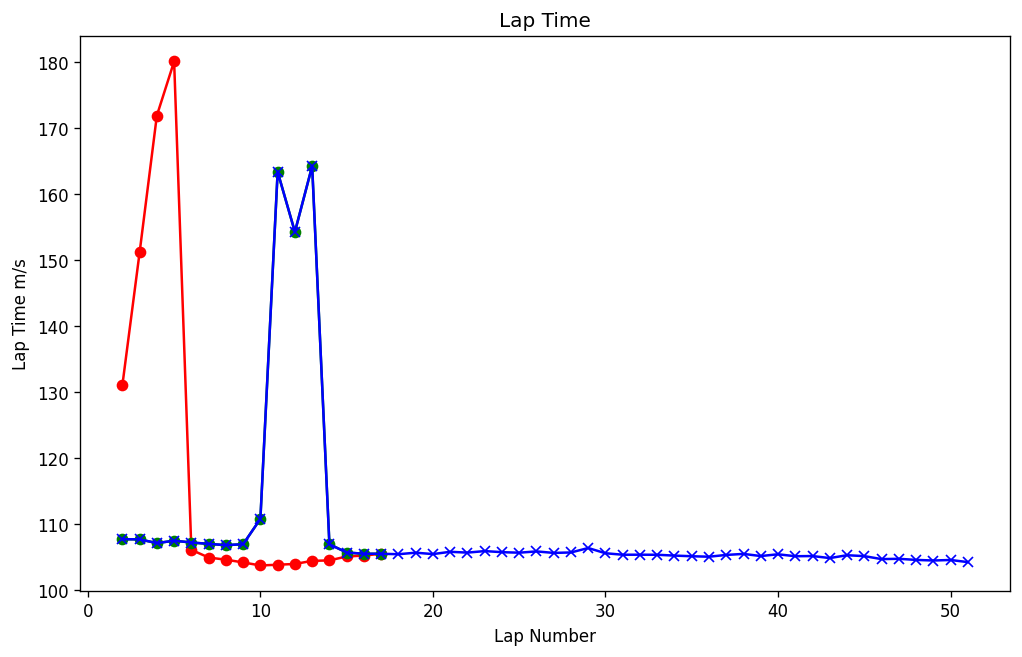

In [43]:
def convert_lap_time(df: pd.DataFrame, column: str) -> str:
    for i in df[column]:
        minutes = i // 60
        remaining_seconds = i % 60
        print(f"Lap Time: {minutes} : {remaining_seconds} seconds")

print("Sprint Lap Duration: ")
convert_lap_time(dfLap, 'lap_duration')

print("GP Lap Duration: ")
convert_lap_time(dfGPLap, 'lap_duration')

dfGPLapReduced: pd.DataFrame = dfGPLap.iloc[:17, :]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='o')
plt.plot(dfGPLapReduced['lap_number'], dfGPLapReduced['lap_duration'], color='green', marker='o')
plt.plot(dfGPLap['lap_number'], dfGPLap['lap_duration'], color='blue', marker='x')

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()

Sprint Lap Duration: 
Lap Time: nan : nan seconds
Lap Time: 2.0 : 11.008999999999986 seconds
Lap Time: 2.0 : 31.145999999999987 seconds
Lap Time: 2.0 : 51.87700000000001 seconds
Lap Time: 3.0 : 0.07499999999998863 seconds
Lap Time: 1.0 : 46.086 seconds
Lap Time: 1.0 : 44.928 seconds
Lap Time: 1.0 : 44.596999999999994 seconds
Lap Time: 1.0 : 44.184 seconds
Lap Time: 1.0 : 43.723 seconds
Lap Time: 1.0 : 43.834999999999994 seconds
Lap Time: 1.0 : 43.952 seconds
Lap Time: 1.0 : 44.42100000000001 seconds
Lap Time: 1.0 : 44.489999999999995 seconds
Lap Time: 1.0 : 45.086 seconds
Lap Time: 1.0 : 45.224000000000004 seconds
Lap Time: 1.0 : 45.5 seconds
GP Lap Duration: 
Lap Time: nan : nan seconds
Lap Time: 1.0 : 47.706999999999994 seconds
Lap Time: 1.0 : 47.67700000000001 seconds
Lap Time: 1.0 : 47.108000000000004 seconds
Lap Time: 1.0 : 47.476 seconds
Lap Time: 1.0 : 47.202 seconds
Lap Time: 1.0 : 46.995000000000005 seconds
Lap Time: 1.0 : 46.801 seconds
Lap Time: 1.0 : 46.944 seconds
Lap Time

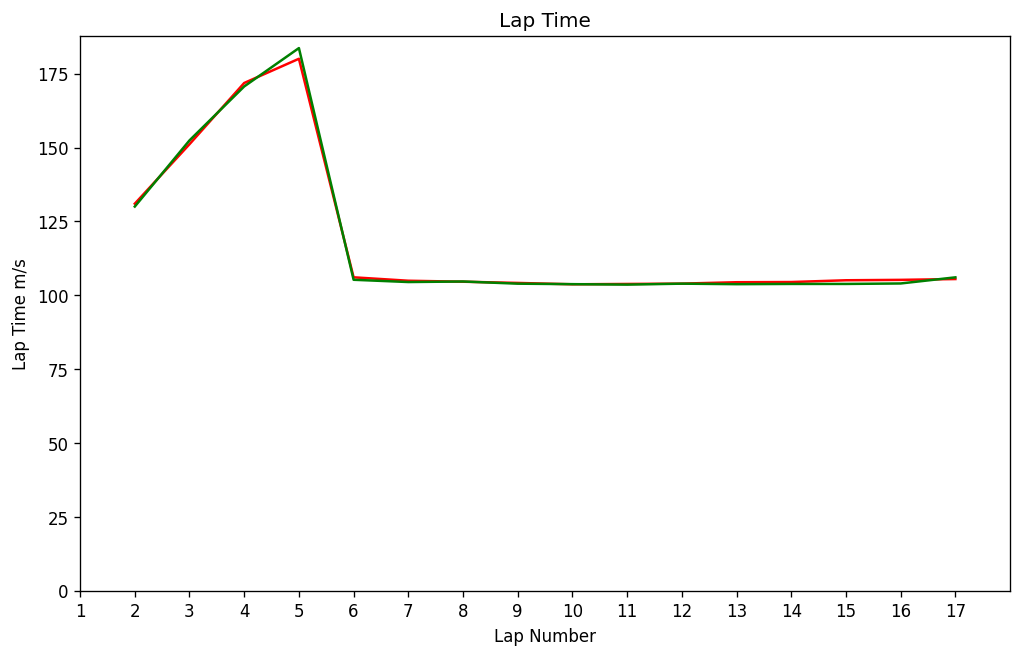

In [44]:
print("Sprint Lap Duration: ")
convert_lap_time(dfLap, 'lap_duration')

print("GP Lap Duration: ")
convert_lap_time(dfGPLap, 'lap_duration')

dfPerGPLapReduced: pd.DataFrame = dfGPLap.iloc[:17, :]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='')
plt.plot(dfPerLap['lap_number'], dfPerLap['lap_duration'], color='green', marker='')

print(f"Azerbaijan Sprint, Verstappen Avg Lap Time: {dfLap['lap_duration'].mean()}, Azerbaijan Sprint, Perez Avg Lap Time:{dfPerLap['lap_duration'].mean()} ")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()

Azerbaijan Grand Prix, Verstappen Avg Lap Time: 109.08234, Azerbaijan Grand Prix, Perez Avg Lap Time:109.02126 


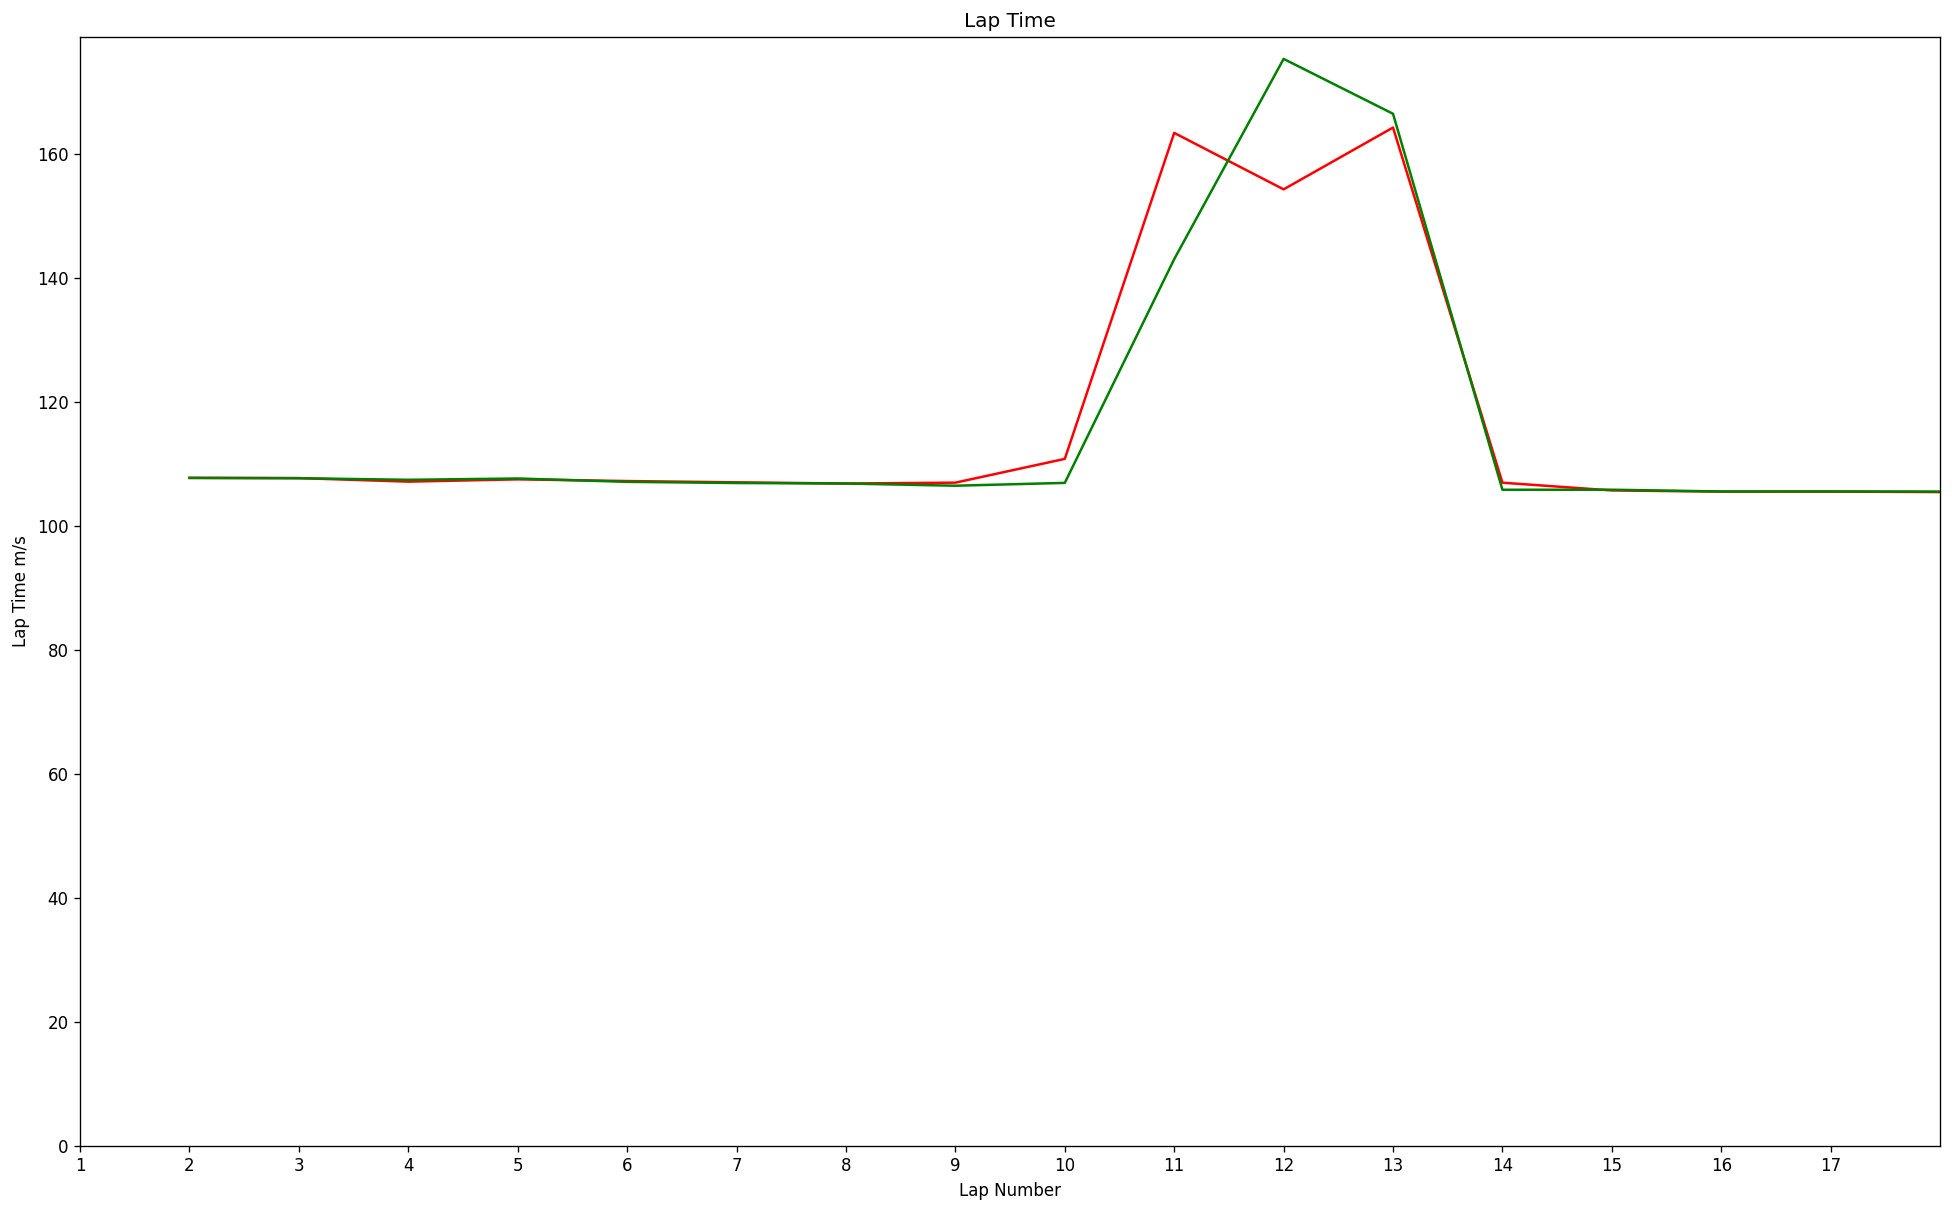

In [45]:
plt.figure(figsize=(20, 12), dpi=120)
plt.plot(dfGPLap['lap_number'], dfGPLap['lap_duration'], color='red', marker='')
plt.plot(dfPerGPLap['lap_number'], dfPerGPLap['lap_duration'], color='green', marker='')

print(f"Azerbaijan Grand Prix, Verstappen Avg Lap Time: {dfGPLap['lap_duration'].mean()}, Azerbaijan Grand Prix, Perez Avg Lap Time:{dfPerGPLap['lap_duration'].mean()} ")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()